Você pode adquirir versões impressas e de e-book do *Think Python 3e* (em inglês) em
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) e
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

Uma versão em língua portuguesa da 3ª edição foi publicada pela editora [Novatec](https://novatec.com.br/livros/pense-em-python-3ed/).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# Listas

Este capítulo apresenta um dos tipos internos mais úteis do Python, listas.
Você também aprenderá mais sobre objetos e o que pode acontecer quando várias variáveis ​​se referem ao mesmo objeto.

Nos exercícios no final do capítulo, faremos uma lista de palavras e a usaremos para procurar palavras especiais como palíndromos e anagramas.

## Uma lista é uma sequência

Como uma *string*, uma **lista** é uma sequência de valores. Em uma *string*, os valores são caracteres; em uma lista, eles podem ser de qualquer tipo.
Os valores em uma lista são chamados de **elementos**.

Existem várias maneiras de criar uma nova lista; a mais simples é colocar os elementos entre colchetes (`[` e `]`).
Por exemplo, aqui está uma lista de dois inteiros:

In [ ]:
numbers = [42, 123]

E aqui está uma lista de três *strings*:

In [ ]:
cheeses = ['Cheddar', 'Edam', 'Gouda']

The elements of a list don't have to be the same type.
The following list contains a string, a float, an integer, and even another list.
Os elementos de uma lista não precisam ser do mesmo tipo.
A lista a seguir contém uma *string*, um *float*, um inteiro e até mesmo outra lista:

In [ ]:
t = ['spam', 2.0, 5, [10, 20]]

Uma lista dentro de outra lista está **aninhada**.

Uma lista que não contém elementos é chamada de lista vazia; você pode criar uma com colchetes vazios, `[]`:

In [ ]:
empty = []

A função `len` devolve o comprimento de uma lista:

In [ ]:
len(cheeses)

3

O comprimento de uma lista vazia é `0`:

In [ ]:
len(empty)

0

A figura a seguir mostra o diagrama de estado para `cheeses`, `numbers` e `empty`.

In [ ]:
from diagram import make_list, Binding, Value

list1 = make_list(cheeses, dy=-0.3, offsetx=0.17)
binding1 = Binding(Value('cheeses'), list1)

list2 = make_list(numbers, dy=-0.3, offsetx=0.17)
binding2 = Binding(Value('numbers'), list2)

list3 = make_list(empty, dy=-0.3, offsetx=0.1)
binding3 = Binding(Value('empty'), list3)

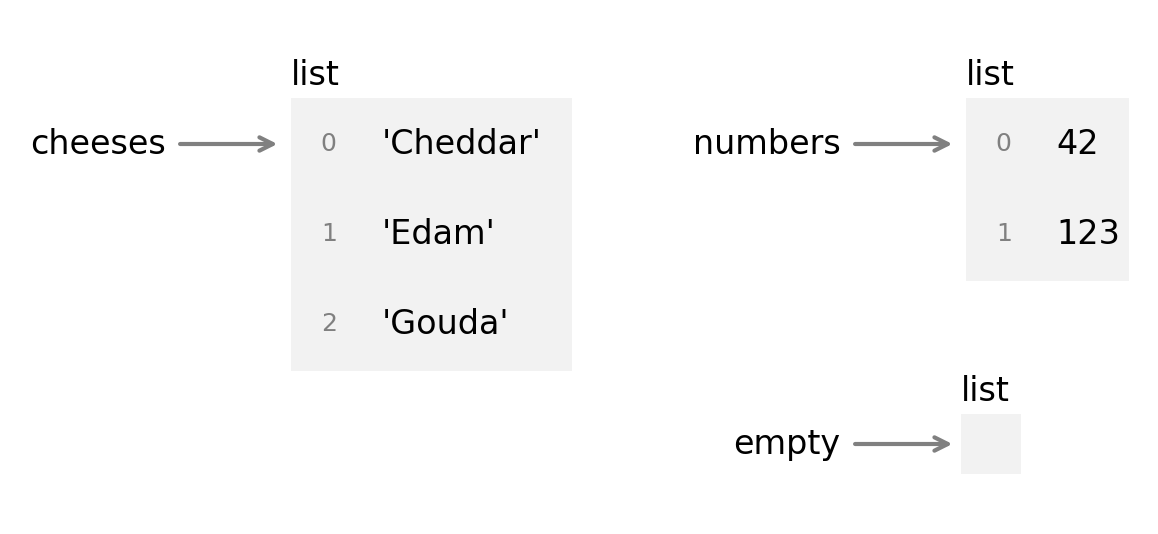

In [ ]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [3.66, 1.58, 0.45, 1.2]
ax = diagram(width, height)
bbox1 = binding1.draw(ax, x, y)
bbox2 = binding2.draw(ax, x+2.25, y)
bbox3 = binding3.draw(ax, x+2.25, y-1.0)

bbox = Bbox.union([bbox1, bbox2, bbox3])
#adjust(x, y, bbox)

As listas são representadas por caixas com a palavra "lista" do lado de fora e os elementos numerados da lista dentro.

## Listas são mutáveis

Para ler um elemento de uma lista, podemos usar o operador de colchetes.
O índice do primeiro elemento é `0`:

In [ ]:
cheeses[0]

'Cheddar'

Diferentemente de *strings*, listas são mutáveis. Quando o operador de colchetes aparece no lado esquerdo de uma atribuição, ele identifica o elemento da lista ao qual o novo valor será atribuído:

In [ ]:
numbers[1] = 17
numbers

[42, 17]

O segundo elemento de `numbers`, que costumava ser `123`, agora é `17`.

Os índices de lista funcionam da mesma forma que os índices de *strings*:

- Qualquer expressão inteira pode ser usada como um índice.

- Se você tentar ler ou escrever um elemento que não existe, você obtém
um `IndexError`.

- Se um índice tiver um valor negativo, ele conta de trás para frente a partir do final da lista.

O operador `in` funciona em listas -- ele verifica se um dado elemento aparece em qualquer lugar da lista:

In [ ]:
'Edam' in cheeses

True

In [ ]:
'Wensleydale' in cheeses

False

Embora uma lista possa conter outra lista, a lista aninhada ainda conta como um único elemento -- portanto, na lista a seguir, há apenas quatro elementos:

In [ ]:
t = ['spam', 2.0, 5, [10, 20]]
len(t)

4

E `10` não é considerado um elemento de `t` porque é um elemento de uma lista aninhada, não de `t`:

In [ ]:
10 in t

False

## Fatiamento de listas

O operador de fatiamento funciona em listas da mesma forma que funciona em *strings*. O exemplo a seguir seleciona o segundo e o terceiro elementos de uma lista de quatro letras:

In [ ]:
letters = ['a', 'b', 'c', 'd']
letters[1:3]

['b', 'c']

Se você omitir o primeiro índice, o fatiamento começará do início:

In [ ]:
letters[:2]

['a', 'b']

Se você omitir o segundo, o fatiamento vai para o final:

In [ ]:
letters[2:]

['c', 'd']

Então, se você omitir ambos, a fatia será uma cópia da lista inteira:

In [ ]:
letters[:]

['a', 'b', 'c', 'd']

Outra maneira de copiar uma lista é usar a função `list`:

In [ ]:
list(letters)

['a', 'b', 'c', 'd']

Como `list` é o nome de uma função interna, você deve evitar usá-la como nome de variável.


## Operações com listas

O operador `+` concatena listas:

In [ ]:
t1 = [1, 2]
t2 = [3, 4]
t1 + t2

[1, 2, 3, 4]

O operador `*` repete uma lista um determinado número de vezes:

In [ ]:
['spam'] * 4

['spam', 'spam', 'spam', 'spam']

Nenhum outro operador matemático funciona com listas, mas a função interna `sum` soma os seus elementos:

In [ ]:
sum(t1)

3

E `min` e `max` encontram os menores e maiores elementos:

In [ ]:
min(t1)

1

In [ ]:
max(t2)

4

## Métodos de listas

O Python fornece métodos que operam em listas. Por exemplo, `append` adiciona um novo elemento ao final de uma lista:

In [ ]:
letters.append('e')
letters

['a', 'b', 'c', 'd', 'e']

`extend` recebe uma lista como argumento e acrescenta todos os elementos:

In [ ]:
letters.extend(['f', 'g'])
letters

['a', 'b', 'c', 'd', 'e', 'f', 'g']

Existem dois métodos que removem elementos de uma lista.
Se você souber o índice do elemento que deseja, você pode usar `pop`:

In [ ]:
t = ['a', 'b', 'c']
t.pop(1)

'b'

O valor devolvido é o elemento que foi removido.
E podemos confirmar que a lista foi modificada:

In [ ]:
t

['a', 'c']

Se você souber o elemento que deseja remover (mas não o índice), você pode usar `remove`:

In [ ]:
t = ['a', 'b', 'c']
t.remove('b')

O valor devovldio de `remove` é `None`.
Mas podemos confirmar que a lista foi modificada:

In [ ]:
t

['a', 'c']

Se o elemento que você solicitou não estiver na lista, isso é um `ValueError`:

In [ ]:
%%expect ValueError

t.remove('d')

ValueError: list.remove(x): x not in list

## Listas e *strings*

Uma *string* é uma sequência de caracteres e uma lista é uma sequência de valores, mas uma lista de caracteres não é o mesmo que uma string.
Para converter uma *string* para uma lista de caracteres, você pode usar a função `list`:

In [ ]:
s = 'spam'
t = list(s)
t

['s', 'p', 'a', 'm']

A função `list` quebra uma *string* em letras individuais.
Se você quiser quebrar uma *string* em palavras, você pode usar o método `split`:

In [ ]:
s = 'pining for the fjords'
t = s.split()
t

['pining', 'for', 'the', 'fjords']

Um argumento opcional chamado **delimitador** especifica quais caracteres usar como limites de palavras. O exemplo a seguir usa um hífen como delimitador:

In [ ]:
s = 'ex-parrot'
t = s.split('-')
t

['ex', 'parrot']

Se você tiver uma lista de *strings*, você pode concatená-las em uma única *string* usando `join`.
`join` é um método de *string*, então você tem que invocá-lo no delimitador e passar a lista como um argumento:

In [ ]:
delimiter = ' '
t = ['pining', 'for', 'the', 'fjords']
s = delimiter.join(t)
s

'pining for the fjords'

Neste caso, o delimitador é um caractere de espaço, então `join` coloca um espaço entre as palavras.
Para unir *strings* sem espaços, você pode usar a string vazia, `''`, como delimitador.

## Percorrendo uma lista

Você pode usar uma instrução `for` para percorrer os elementos de uma lista.

In [ ]:
for cheese in cheeses:
    print(cheese)

Cheddar
Edam
Gouda


Por exemplo, depois de usar `split` para fazer uma lista de palavras, podemos usar `for` para percorrê-las:

In [ ]:
s = 'pining for the fjords'

for word in s.split():
    print(word)

pining
for
the
fjords


Um laço `for` em uma lista vazia nunca executa as instruções do bloco:

In [ ]:
for x in []:
    print('This never happens.')

## Ordenando listas

O Python fornece uma função interna chamada `sorted` que ordena os elementos de uma lista:

In [ ]:
scramble = ['c', 'a', 'b']
sorted(scramble)

['a', 'b', 'c']

A lista original não foi alterada.

In [ ]:
scramble

['c', 'a', 'b']

`sorted` funciona com qualquer tipo de sequência, não apenas listas. Então podemos ordenar as letras em uma string assim:

In [ ]:
sorted('letters')

['e', 'e', 'l', 'r', 's', 't', 't']

O resultado é uma lista.
Para converter a lista em uma *string*, podemos usar `join`.

In [ ]:
''.join(sorted('letters'))

'eelrstt'

Com uma *string* vazia como delimitador, os elementos da lista são unidos sem nada entre eles.

## Objetos e valores

Se executarmos essas instruções de atribuição:

In [ ]:
a = 'banana'
b = 'banana'

Sabemos que ambos `a` e `b` se referem a uma *string*, mas não sabemos se eles se referem à *mesma* *string*.
Existem dois estados possíveis, mostrados na figura a seguir:

In [ ]:
from diagram import Frame, Stack

s = 'banana'
bindings = [Binding(Value(name), Value(repr(s))) for name in 'ab']
frame1 = Frame(bindings, dy=-0.25)

binding1 = Binding(Value('a'), Value(repr(s)), dy=-0.11)
binding2 = Binding(Value('b'), draw_value=False, dy=0.11)
frame2 = Frame([binding1, binding2], dy=-0.25)

stack = Stack([frame1, frame2], dx=1.7, dy=0)

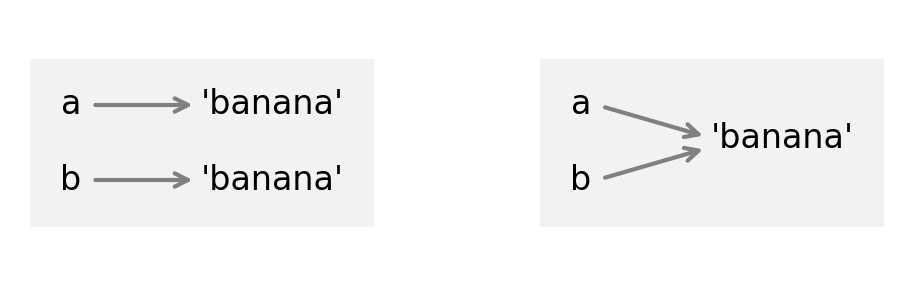

In [ ]:
width, height, x, y = [2.85, 0.76, 0.17, 0.51]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

No diagrama à esquerda, `a` e `b` referem-se a dois objetos diferentes que têm o
mesmo valor. No diagrama à direita, elas se referem ao mesmo objeto.
Para verificar se duas variáveis ​​se referem ao mesmo objeto, você pode usar o operador `is`:

In [ ]:
a = 'banana'
b = 'banana'
a is b

True

Neste exemplo, Python criou apenas um objeto *string*, e ambos `a` e `b` se referem a ele.
Mas quando você cria duas listas, você obtém dois objetos:

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]
a is b

False

Então o diagrama de estados fica assim:

In [ ]:
t = [1, 2, 3]
binding1 = Binding(Value('a'), Value(repr(t)))
binding2 = Binding(Value('b'), Value(repr(t)))
frame = Frame([binding1, binding2], dy=-0.25)

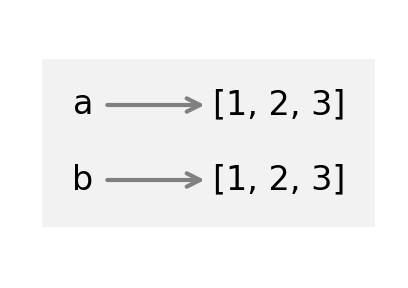

In [ ]:
width, height, x, y = [1.16, 0.76, 0.21, 0.51]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y)
# adjust(x, y, bbox)

Neste caso diríamos que as duas listas são **equivalentes**, porque elas têm os mesmos elementos, mas não **idênticas**, porque não são o mesmo objeto.
Se dois objetos são idênticos, eles também são equivalentes, mas se são equivalentes, não são necessariamente idênticos.

## *Aliasing*

NOTA DO TRADUTOR: *aliasing* não tem um tradução adequado para o português no contexto de programação é usado corriqueiramente como parte do jargão de um cientista da computação. *Alias* é traduzido com um apelido ou pseudônimo, portanto a ideia é que vários nomes podem se referir à mesma coisa.

Se `a` se refere a um objeto e você atribui `b = a`, então ambas as variáveis ​​se referem ao mesmo objeto:

In [ ]:
a = [1, 2, 3]
b = a
b is a

True

Então o diagrama de estados fica assim:

In [ ]:
t = [1, 2, 3]
binding1 = Binding(Value('a'), Value(repr(t)), dy=-0.11)
binding2 = Binding(Value('b'), draw_value=False, dy=0.11)
frame = Frame([binding1, binding2], dy=-0.25)

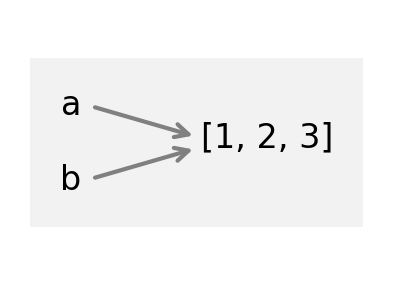

In [ ]:
width, height, x, y = [1.11, 0.81, 0.17, 0.56]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y)
# adjust(x, y, bbox)

A associação de uma variável com um objeto é chamada de **referência**.
Neste exemplo, há duas referências ao mesmo objeto.

Um objeto com mais de uma referência tem mais de um nome, então dizemos que o objeto está ***aliased**.*
Se o objeto *aliased* for mutável, as alterações feitas com um nome afetam o outro.
Neste exemplo, se alterarmos o objeto ao qual `b` se refere, também estamos alterando o objeto ao qual `a` se refere.

In [ ]:
b[0] = 5
a

[5, 2, 3]

Então diríamos que `a` "vê" essa mudança.
Embora esse comportamento possa ser útil, ele é propenso a erros.
Em geral, é mais seguro evitar *aliasing* quando você está trabalhando com objetos mutáveis.

Para objetos imutáveis ​​como *strings*, *aliasing* não é um problema tão grande.
Neste exemplo:

In [ ]:
a = 'banana'
b = 'banana'

Quase nunca faz diferença se `a` e `b` se referem à mesma *string* ou não.

## Argumentos de listas

Quando você passa uma lista para uma função, a função obtém uma referência à
lista. Se a função modifica a lista, o chamador vê a alteração. Por
exemplo, `pop_first` usa o método `pop` de lista para remover o primeiro elemento de uma lista:

In [ ]:
def pop_first(lst):
    return lst.pop(0)

Podemos usá-la assim:

In [ ]:
letters = ['a', 'b', 'c']
pop_first(letters)

'a'

O valor dedevolvido é o primeiro elemento, que foi removido da lista -- como podemos ver exibindo a lista modificada:

In [ ]:
letters

['b', 'c']

Neste exemplo, o parâmetro `lst` e a variável `letters` são *aliases* para o mesmo objeto, então o diagrama de estado fica assim:

In [ ]:
lst = make_list('abc', dy=-0.3, offsetx=0.1)
binding1 = Binding(Value('letters'), draw_value=False)
frame1 = Frame([binding1], name='__main__', loc='left')

binding2 = Binding(Value('lst'), draw_value=False, dx=0.61, dy=0.35)
frame2 = Frame([binding2], name='pop_first', loc='left', offsetx=0.08)

stack = Stack([frame1, frame2], dx=-0.3, dy=-0.5)

[2.04, 1.24, 1.06, 0.85]

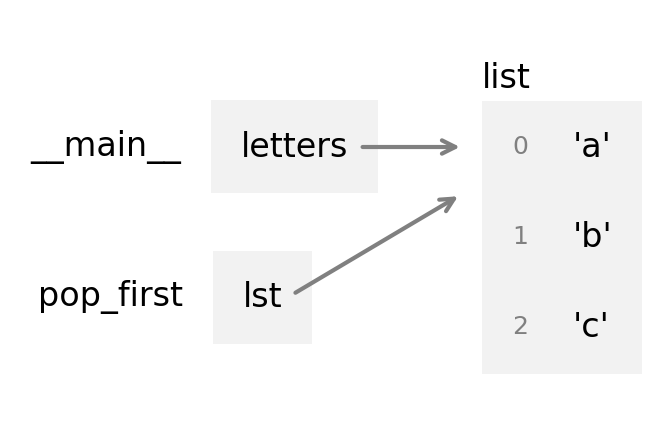

In [ ]:
width, height, x, y = [2.04, 1.24, 1.06, 0.85]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = lst.draw(ax, x+0.5, y)
bbox = Bbox.union([bbox1, bbox2])
adjust(x, y, bbox)

If the function modifies the object, those changes persist after the function is done.
Passar uma referência a um objeto como argumento para uma função cria uma forma de *aliasing*.
Se a função modifica o objeto, essas alterações persistem após a função encerrar.

## Criando uma lista de palavras

No capítulo anterior, lemos o arquivo `words.txt` e procuramos por palavras com certas propriedades, como palavras que usam a letra `e`.
Porém fizemos a leitura do arquivo inteiro muitas vezes, o que não é eficiente.
É melhor ler o arquivo uma vez e colocar as palavras em uma lista.
O laço a seguir mostra como:

In [ ]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

'words.txt'

In [ ]:
word_list = []

for line in open('words.txt'):
    word = line.strip()
    word_list.append(word)

len(word_list)

113783

Antes do laço, `word_list` é inicializada com uma lista vazia.
A cada vez que o laço é executado, o método `append` adiciona uma palavra ao final.
Quando o laço é concluído, há mais de 113.000 palavras na lista.

Outra maneira de fazer a mesma coisa é usar `read` para ler o arquivo inteiro em atribuir a uma *string*:

In [ ]:
string = open('words.txt').read()
len(string)

1016511

O resultado é uma única *string* com mais de um milhão de caracteres.
Podemos usar o método `split` para dividi-la em uma lista de palavras:

In [ ]:
word_list = string.split()
len(word_list)

113783

Agora, para verificar se uma *string* aparece na lista, podemos usar o operador `in`.
Por exemplo, `'demotic'` está na lista:

In [ ]:
'demotic' in word_list

True

Mas `'contrafibularities'` não está:

In [ ]:
'contrafibularities' in word_list

False

E devo dizer que estou anaspéptico (em inglês, *anaspeptic*) em relação a isso.

## Depuração

Note que a maioria dos métodos de lista modificam o argumento e devolvem `None`.
Isso é o oposto dos métodos de *string*, que devolvem uma nova *string* e deixam a original como estava.

Se você está acostumado a escrever código de *string* como este:

In [ ]:
word = 'plumage!'
word = word.strip('!')
word

'plumage'

É tentador escrever código de lista como este:

In [ ]:
t = [1, 2, 3]
t = t.remove(3)           # WRONG!

`remove` modifica a lista e devolve `None`, então a próxima operação que você executar com `t` provavelmente falhará:

In [ ]:
%%expect AttributeError

t.remove(2)

AttributeError: 'NoneType' object has no attribute 'remove'

Esta mensagem de erro requer alguma explicação.
Um **atributo** de um objeto é uma variável ou método associado a ele.
Neste caso, o valor de `t` é `None`, que é um objeto `NoneType`, que não tem um atributo chamado `remove`, então o resultado é um `AttributeError`.

Se você vir uma mensagem de erro como esta, você deve olhar para trás para frente o programa e ver se você chamou um método de lista incorretamente.

## Glossário

**lista** (*list*)**:**
Um objeto que contém uma sequência de valores.

**elemento** (*element*)**:**
Um dos valores em uma lista ou outra sequência.

**lista aninhada** (*nested list*)**:**
Uma lista que é um elemento de outra lista.

**delimitador** (*delimiter*)**:**
Um caractere ou *string* usado para indicar onde uma *string* deve ser dividida.

**equivalente** (*equivalent*)**:**
Ter o mesmo valor.

**idêntico** (*identical*)**:**
Ser o mesmo objeto (o que implica equivalência).

**referência** (*reference*)**:**
A associação entre uma variável e seu valor.

***aliased*:**
Se houver mais de uma variável que se refere a um objeto, o objeto está *aliased*.

**atributo** (*attribute*)**:**
Um dos valores nomeados associados a um objeto.

## Exercícios

In [ ]:
# Esta célula diz ao Jupyter para fornecer informações detalhadas de depuração
# quando ocorre um erro de tempo de execução. Execute-a antes de trabalhar nos
# exercícios.

%xmode Verbose

### Pergunte a um assistente virtual

Neste capítulo, usei as palavras "*contrafibularities*" e "*anaspeptic*", mas elas não são palavras em inglês de verdade.
Elas foram usadas no programa de televisão britânico *Black Adder*, Temporada 3, Episódio 2, "Ink and Incapability".

No entanto, quando perguntei ao ChatGPT 3.5 (versão de 3 de agosto de 2023) de onde essas palavras vieram, ele inicialmente afirmou que elas são do Monty Python e, mais tarde, afirmou que são da peça de Tom Stoppard *Rosencrantz and Guildenstern Are Dead*.

Se você perguntar agora, poderá obter resultados diferentes.
Mas este exemplo é um lembrete de que assistentes virtuais nem sempre são precisos, então você deve verificar se os resultados estão corretos.
À medida que você ganha experiência, terá uma noção de quais perguntas os assistentes virtuais podem responder de forma confiável.
Neste exemplo, uma pesquisa convencional na web pode identificar a fonte dessas palavras rapidamente.

Se você ficar preso em algum dos exercícios deste capítulo, considere pedir ajuda a um assistente virtual.
Se você obtiver um resultado que use recursos que ainda não aprendemos, você pode atribuir ao assistente virtual um "papel".

Por exemplo, antes de fazer uma pergunta, tente digitar "Papel: Instrutor de Programação Básica em Python" ("*Role: Basic Python Programming Instructor*").
Depois disso, as respostas que você obtiver devem usar apenas recursos básicos.
Se você ainda vir recursos que não aprendeu, você pode prosseguir com "Você consegue escrever isso usando apenas recursos básicos do Python?" ("*Can you write that using only basic Python features?*").### Ask a virtual assistant

In this chapter, I used the words "contrafibularities" and "anaspeptic", but they are not actually English words.
They were used in the British television show *Black Adder*, Season 3, Episode 2, "Ink and Incapability".

However, when I asked ChatGPT 3.5 (August 3, 2023 version) where those words came from, it initially claimed they are from Monty Python, and later claimed they are from the Tom Stoppard play *Rosencrantz and Guildenstern Are Dead*.

If you ask now, you might get different results.
But this example is a reminder that virtual assistants are not always accurate, so you should check whether the results are correct.
As you gain experience, you will get a sense of which questions virtual assistants can answer reliably.
In this example, a conventional web search can identify the source of these words quickly.

If you get stuck on any of the exercises in this chapter, consider asking a virtual assistant for help.
If you get a result that uses features we haven't learned yet, you can assign the VA a "role".

For example, before you ask a question try typing "Role: Basic Python Programming Instructor".
After that, the responses you get should use only basic features.
If you still see features we you haven't learned, you can follow up with "Can you write that using only basic Python features?"

### Exercício

Duas palavras são anagramas se você puder reorganizar as letras de uma para escrever a outra.
Por exemplo, `tops` é um anagrama de `stop`.

Uma maneira de verificar se duas palavras são anagramas é ordenar as letras em ambas as palavras.
Se as listas de letras ordenadas forem as mesmas, as palavras são anagramas.

Escreva uma função chamada `is_anagram` que recebe duas strings e devolve `True` se forem anagramas.

Para começar, aqui está um esboço da função com doctests:

In [ ]:
def is_anagram(word1, word2):
    """Verifica se duas palavras são anagramas.

    >>> is_anagram('tops', 'stop')
    True
    >>> is_anagram('skate', 'takes')
    True
    >>> is_anagram('tops', 'takes')
    False
    >>> is_anagram('skate', 'stop')
    False
    """
    return None

In [ ]:
# Solução

def is_anagram(word1, word2):
    """Verifica se duas palavras são anagramas.

    >>> is_anagram('tops', 'stop')
    True
    >>> is_anagram('skate', 'takes')
    True
    >>> is_anagram('tops', 'takes')
    False
    >>> is_anagram('skate', 'stop')
    False
    """
    return sorted(word1) == sorted(word2)

Você pode usar `doctest` para testar sua função:

In [ ]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

run_doctests(is_anagram)

Usando sua função e a lista de palavras, encontre todos os anagramas de `takes`.

In [ ]:
# Solução

for word in word_list:
    if is_anagram(word, 'takes'):
        print(word)

skate
stake
steak
takes
teaks


### Exercício

O Python fornece uma função interna chamada `reversed` que recebe como argumento uma sequência de elementos -- como uma lista ou uma *string* -- e devolve um objeto `reversed` que contém os elementos em ordem reversa:

In [ ]:
reversed('parrot')

Se você quiser os elementos invertidos em uma lista, você pode usar a função `list`:

In [ ]:
list(reversed('parrot'))

['t', 'o', 'r', 'r', 'a', 'p']

Ou se você quiser colocá-los em uma *string*, você pode usar o método `join`:

In [ ]:
''.join(reversed('parrot'))

'torrap'

Então podemos escrever uma função que inverte uma palavra assim:

In [ ]:
def reverse_word(word):
    return ''.join(reversed(word))

Um palíndromo é uma palavra que é escrita da mesma forma de trás para frente, como "noon" e "rotator".
Escreva uma função chamada `is_palindrome` que recebe como argumento uma *string* e devolve `True` se for um palíndromo e `False` caso contrário.

Aqui está um esboço da função com `doctests` que você pode usar para verificar sua função:

In [ ]:
def is_palindrome(word):
    """Verifica se uma palavra é um palíndromo.

    >>> is_palindrome('bob')
    True
    >>> is_palindrome('alice')
    False
    >>> is_palindrome('a')
    True
    >>> is_palindrome('')
    True
    """
    return False

In [ ]:
# Solução

def is_palindrome(word):
    """Verifica se uma palavra é um palíndromo.

    >>> is_palindrome('bob')
    True
    >>> is_palindrome('alice')
    False
    >>> is_palindrome('a')
    True
    >>> is_palindrome('')
    True
    """
    return reverse_word(word) == word

In [ ]:
run_doctests(is_palindrome)

Você pode usar o seguinte laço de repetição para encontrar todos os palíndromos na lista de palavras com pelo menos 7 letras:

In [ ]:
for word in word_list:
    if len(word) >= 7 and is_palindrome(word):
        print(word)

deified
halalah
reifier
repaper
reviver
rotator
sememes


### Exercício

Escreva uma função chamada `reverse_sentence` que recebe como argumento uma *string* que contém qualquer número de palavras separadas por espaços.
Ela deve devolver uma nova *string* que contém as mesmas palavras em ordem reversa.
Por exemplo, se o argumento for "Reverse this sentence", o resultado deve ser "Sentence this reverse".

Dica: você pode usar os métodos `capitalize` para colocar a primeira palavra em maiúscula e converter as outras palavras em minúsculas.

Para começar, aqui está um esboço da função com `doctests`:

In [ ]:
def reverse_sentence(input_string):
    '''Inverte as palavras em uma sequência e coloca a primeira letra em
    maiúscula.

    >>> reverse_sentence('Reverse this sentence')
    'Sentence this reverse'

    >>> reverse_sentence('Python')
    'Python'

    >>> reverse_sentence('')
    ''

    >>> reverse_sentence('One for all and all for one')
    'One for all and all for one'
    '''
    return None

In [ ]:
# Solução

def reverse_sentence(input_string):
    '''Inverte as palavras em uma sequência e coloca a primeira letra em
    maiúscula.

    >>> reverse_sentence('Reverse this sentence')
    'Sentence this reverse'

    >>> reverse_sentence('Python')
    'Python'

    >>> reverse_sentence('')
    ''

    >>> reverse_sentence('One for all and all for one')
    'One for all and all for one'
    '''
    words = input_string.split()
    reversed_words = ' '.join(reversed(words))
    return reversed_words.capitalize()

In [ ]:
run_doctests(reverse_sentence)

### Exercício

Escreva uma função chamada `total_length` que recebe uma lista de *strings* e devolve o comprimento total das *strings*.
O comprimento total das palavras em `word_list` deve ser $902{.}728$.

In [ ]:
# Solução

def total_length(string_list):
    total = 0
    for string in string_list:
        total += len(string)
    return total

In [ ]:
# Solução

total_length(word_list)

902728

[Pense Python: 3ª Edição](https://rodrigocarlson.github.io/PensePython3ed/)

Copyright 2024 [Allen B. Downey](https://allendowney.com/) (versão original)

Copyright 2025 [Rodrigo Castelan Carlson](https://rodrigocarlson.paginas.ufsc.br/) (desta versão)

Foram preservadas as mesmas licenças da versão original.

Licença dos códigos: [MIT License](https://mit-license.org/)

Licença dos textos: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)